In [1]:
import os
import json
#!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
cid ='d8762235995b4ddcbc0df90739df9a63' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = '887a4eccdbde4195bfc0f7f4c472fe70' # Client Secret; copy this from your app
username = '12155311349' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'
redirect_uri='https://localhost:8080/callback/'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username,scope,client_id=cid,client_secret=secret,redirect_uri="https://localhost:8080/callback/")
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [3]:
song_name = input("Search a song for recommendations: ")

Search a song for recommendations: Mask off


In [4]:
# Define the search query
search_results = sp.search(q=song_name, type='track', limit=1)
track_id = search_results['tracks']['items'][0]['id']

# Get the audio features, year, and popularity of the song
track_id = search_results['tracks']['items'][0]['id']
audio_features = sp.audio_features([track_id])[0]
year = search_results['tracks']['items'][0]['album']['release_date'][:4]
popularity = search_results['tracks']['items'][0]['popularity']

# Find similar songs based on audio features, year, and popularity
similar_songs = sp.recommendations(seed_tracks=[track_id], target_popularity=popularity, limit=100, **audio_features)
# similar_songs = sp.recommendations(seed_tracks=[track_id], limit=100, **audio_features)

# Extract relevant info from recommendations and store in DataFrame
columns = ['song name', 'artist', 'popularity', 'year', 'iD', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
data = []
for i, track in enumerate(similar_songs['tracks']):
    name = track['name']
    artist = track['artists'][0]['name']
    popularity = track['popularity']
    year = track['album']['release_date'][:4]
    track_id = track['id']
    audio_features = sp.audio_features([track_id])[0]
    danceability = audio_features['danceability']
    loudness = audio_features['loudness']
    energy = audio_features['energy']
    speechiness = audio_features['speechiness']
    acousticness = audio_features['acousticness']
    instrumentalness = audio_features['instrumentalness']
    liveness = audio_features['liveness']
    valence = audio_features['valence']
    tempo = audio_features['tempo']
    data.append([name, artist, popularity, year, track_id, danceability, loudness,energy, speechiness, acousticness, instrumentalness, liveness, valence, tempo])
df = pd.DataFrame(data, columns=columns)

# Scale between 0 and 1
df["tempo"] = (df["tempo"] / df["tempo"].max())
df["loudness"] = (df["loudness"] / df["loudness"].max())
df["energy"] = (df["energy"] / df["energy"].min())
df["popularity"] = (df["popularity"] / 100)

In [5]:
df

,song name,artist,popularity,year,iD,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Mask Off,Future,0.84,2017,0VgkVdmE4gld66l8iyGjgx,0.833,0.750875,0.476923,0.4310,0.01020,0.021900,0.1650,0.281,0.833798
1,SICKO MODE,Travis Scott,0.84,2018,2xLMifQCjDGFmkHkpNLD9h,0.834,0.317084,0.802198,0.2220,0.00513,0.000000,0.1240,0.446,0.861280
2,MIDDLE CHILD,J. Cole,0.84,2019,2JvzF1RMd7lE3KmFlsyZD8,0.837,1.000000,0.400000,0.2760,0.14900,0.000000,0.2710,0.463,0.688900
3,The Box,Roddy Ricch,0.84,2019,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.570904,0.643956,0.0559,0.10400,0.000000,0.7900,0.642,0.649933
4,Pure Cocaine,Lil Baby,0.84,2018,577YBGuskWkVDCxZrLRB4v,0.964,0.518313,0.535165,0.4210,0.00127,0.000007,0.1150,0.107,0.705935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Element,Pop Smoke,0.80,2020,57BGVV6wcyhbn3hsjlqEZB,0.772,0.360283,0.964835,0.3240,0.03010,0.000002,0.2510,0.305,0.340666
96,CAN'T SAY,Travis Scott,0.80,2018,27a1mYSG5tYg7dmEjWBcmL,0.702,0.458123,0.778022,0.0547,0.20100,0.000000,0.1180,0.713,0.822230
97,P.I.M.P.,50 Cent,0.80,2003,3G0yz3DZn3lfraledmBCT0,0.712,0.258175,0.848352,0.3460,0.05210,0.000004,0.0368,0.848,0.470746
98,Go Flex,Post Malone,0.80,2016,5yuShbu70mtHXY0yLzCQLQ,0.665,0.698796,0.547253,0.0832,0.22800,0.000000,0.0757,0.127,0.455438


In [6]:
from sklearn.neighbors import NearestNeighbors

# Define the features to use for the model
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a new dataframe with only the features to use for the model
df_model = df[features]

# Fit the k-nearest neighbors model using the new dataframe
knn = NearestNeighbors(n_neighbors=5)
knn.fit(df_model)

# Find the k nearest neighbors for the user-requested song
song_data = df[df['iD'] == track_id][features]
distances, indices = knn.kneighbors(song_data)

# Create a new dataframe with the nearest neighbors and their features
neighbor_data = df.iloc[indices[0]]

In [7]:
neighbor_data


,song name,artist,popularity,year,iD,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
99,Ambitionz Az A Ridah,2Pac,0.80,1996,5g9lS8deSIxItFBmZRC4vN,0.801,0.560574,1.000000,0.225,0.00239,0.000891,0.0737,0.805,0.484942
12,Ms. Jackson,Outkast,0.84,2000,0I3q5fE6wg7LIfHGngUTnV,0.843,0.507641,0.885714,0.269,0.14300,0.000000,0.0771,0.613,0.527565
52,Alright,Kendrick Lamar,0.82,2015,3iVcZ5G6tvkXZkZKlMpIUs,0.796,0.510032,0.841758,0.238,0.07420,0.000000,0.0827,0.558,0.611388
34,Hit 'Em Up - Single Version,2Pac,0.83,1998,0Z2J91b2iTGLVTZC4fKgxf,0.916,0.338684,0.927473,0.236,0.03940,0.000000,0.0778,0.586,0.528910
13,Yeah! (feat. Lil Jon & Ludacris),Usher,0.84,2004,5rb9QrpfcKFHM1EUbSIurX,0.894,0.401178,0.869231,0.112,0.01830,0.000000,0.0388,0.583,0.583518


<Axes: >

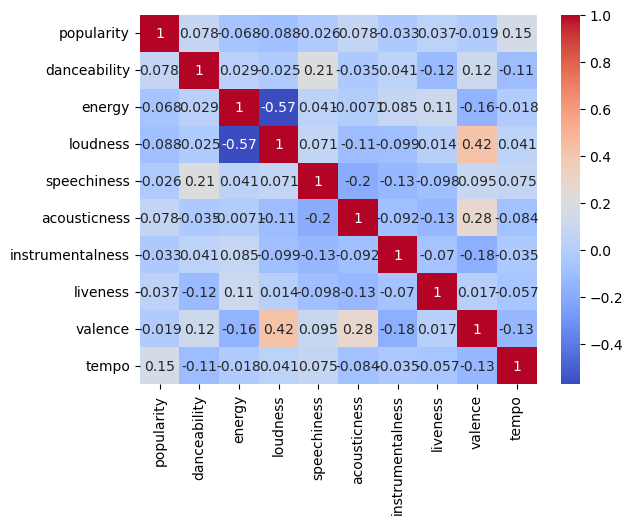

In [8]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.drop(['song name', 'artist', 'year', 'iD'], axis=1).corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: >

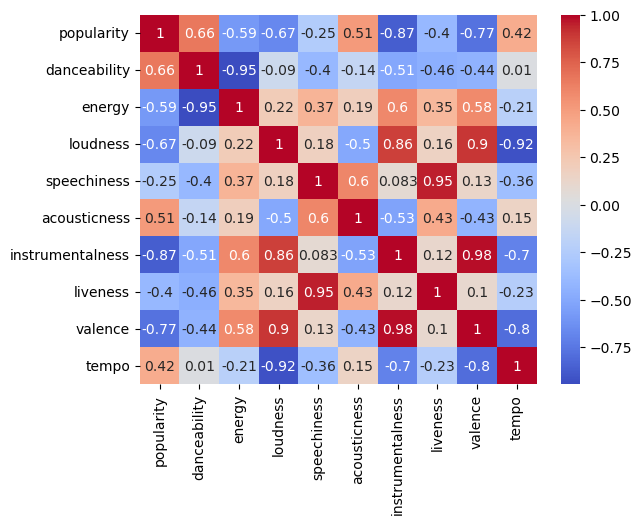

In [9]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = neighbor_data.drop(['song name', 'artist', 'year', 'iD'], axis=1).corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

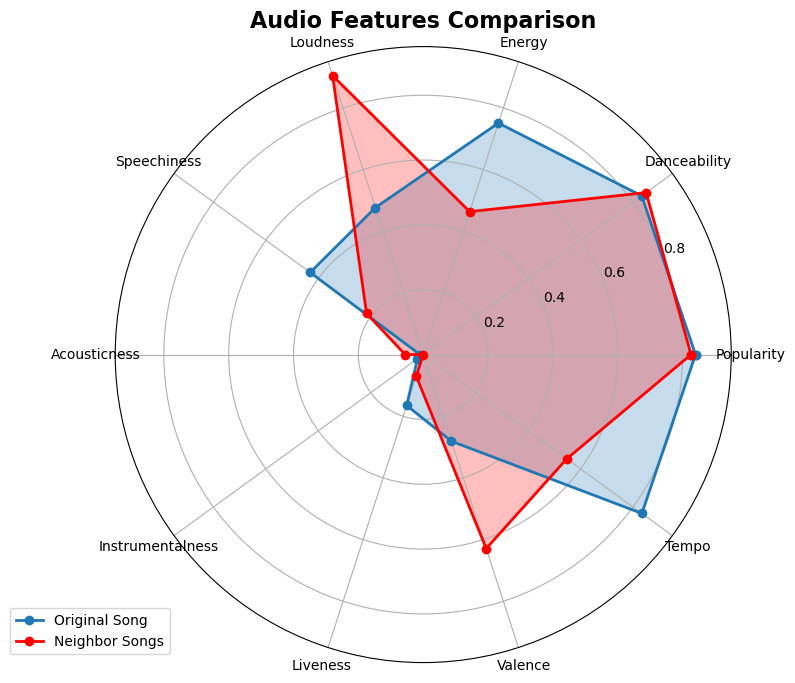

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Get audio features of original song
song_data = df.iloc[0][['popularity','danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
song_features = np.array(song_data.tolist())

# Get audio features of neighbors
neighbor_data = neighbor_data.iloc[0:10][['popularity','danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
neighbor_features = np.array(neighbor_data.values)

# Define feature labels
labels = ['Popularity','Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Define angles and labels for radar chart
angles = np.linspace(0, 2*np.pi, len(song_features)+1, endpoint=True)

# Create figure and subplot for radar chart
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Plot radar chart for song
ax.plot(angles[:], np.append(song_features, song_features[0]), 'o-', linewidth=2, label='Original Song')
ax.fill(angles, np.append(song_features, song_features[0]), alpha=0.25)

# Plot radar chart for neighbors in red
ax.plot(angles[:], np.append(neighbor_features.mean(axis=0), neighbor_features.mean(axis=0)[0]), 'o-', linewidth=2, color='red', label='Neighbor Songs')
ax.fill(angles, np.append(neighbor_features.mean(axis=0), neighbor_features.mean(axis=0)[0]), alpha=0.25, color='red')

# Set tick locations and labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Set title and legend
ax.set_title('Audio Features Comparison', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


# User History Input

In [30]:

short_term_tracks = sp.current_user_top_tracks(time_range='short_term', limit=50)
medium_term_tracks = sp.current_user_top_tracks(time_range='medium_term', limit=50)

# Merge the results and remove duplicates
all_tracks = short_term_tracks['items'] + medium_term_tracks['items']
unique_tracks = {track['id']: track for track in all_tracks}.values()

# Get the audio features for each track
audio_features = {}
for track in unique_tracks:
    audio_features[track['id']] = sp.audio_features(track['id'])[0]

# Create a dataframe with the track information
columns = ['song name', 'artist', 'popularity', 'release date', 'iD', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
data = []
for i, track in enumerate(unique_tracks):
    name = track['name']
    artist = track['artists'][0]['name']
    popularity = track['popularity']
    year = track['album']['release_date'][:4]
    track_id = track['id']
    audio_features = sp.audio_features([track_id])[0]
    danceability = audio_features['danceability']
    loudness = audio_features['loudness']
    energy = audio_features['energy']
    speechiness = audio_features['speechiness']
    acousticness = audio_features['acousticness']
    instrumentalness = audio_features['instrumentalness']
    liveness = audio_features['liveness']
    valence = audio_features['valence']
    tempo = audio_features['tempo']
    data.append([name, artist, popularity, year, track_id, danceability, loudness,energy, speechiness, acousticness, instrumentalness, liveness, valence, tempo])
df = pd.DataFrame(data, columns=columns)

# Scale between 0 and 1
df["tempo"] = (df["tempo"] / df["tempo"].max())
df["loudness"] = (df["loudness"] / df["loudness"].max())
df["energy"] = (df["energy"] / df["energy"].min())
df["popularity"] = (df["popularity"] / 100)

In [31]:
df

,song name,artist,popularity,release date,iD,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Sorry 4 What? // LV BELT,Tory Lanez,0.68,2022,0AyA2lHB4YnQUNa8Y6NNjm,0.652,0.372264,0.706070,0.0628,0.0199,0.000000,0.1320,0.2800,0.617126
1,Search & Rescue,Drake,0.91,2023,7aRCf5cLOFN1U7kvtChY1G,0.817,0.390013,0.468584,0.0734,0.0603,0.000001,0.3300,0.5440,0.696698
2,The Color Violet,Tory Lanez,0.89,2021,3azJifCSqg9fRij2yKIbWz,0.645,0.496597,0.568690,0.0479,0.1570,0.000000,0.0863,0.4630,0.515175
3,Origami (Hotties),Rae Sremmurd,0.64,2023,4euN0XE8wuVc5UHyhMU8uN,0.972,0.325961,0.430245,0.0658,0.0182,0.000061,0.1920,0.0853,0.616130
4,Tommy's Party,Peach Pit,0.66,2018,5OuJTtNve7FxUX82eEBupN,0.565,0.401048,0.466454,0.0311,0.1220,0.046900,0.1080,0.2110,0.657086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Monks,Frank Ocean,0.66,2012,0msrDPXxZpts4FRnoX0bFr,0.747,0.218089,0.807242,0.1790,0.0521,0.000000,0.2140,0.6010,0.500459
83,N Side,Steve Lacy,0.76,2019,12ILYlOEfWL8ei0BEgFJn0,0.838,0.289820,0.569755,0.0432,0.0714,0.000302,0.2080,0.8940,0.588395
84,Major Distribution,Drake,0.79,2022,46s57QULU02Voy0Kup6UEb,0.908,0.482389,0.581470,0.3230,0.0127,0.000000,0.0707,0.2250,0.642698
85,Helluva Price,Gunna,0.61,2018,5bFym95c4l7Q7cVIYArOzC,0.865,0.466894,0.407881,0.2520,0.5790,0.000000,0.1270,0.2450,0.662482


# Getting Recommendations 

In [ ]:
# Define the search query
song_name2 = 'Tommys Party'
search_results2 = sp.search(q=song_name2, type='track', limit=1)
track_id2 = search_results2['tracks']['items'][0]['id']

In [ ]:
# Find similar songs based on audio features, year, and popularity
similar_songs = sp.recommendations(seed_tracks=[track_id], target_popularity=popularity, limit=100, **audio_features)
# similar_songs = sp.recommendations(seed_tracks=[track_id], limit=100, **audio_features)

# Extract relevant info from recommendations and store in DataFrame
columns = ['song name', 'artist', 'popularity', 'year', 'iD', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
data = []
for i, track in enumerate(similar_songs['tracks']):
    name = track['name']
    artist = track['artists'][0]['name']
    popularity = track['popularity']
    year = track['album']['release_date'][:4]
    track_id = track['id']
    audio_features = sp.audio_features([track_id])[0]
    danceability = audio_features['danceability']
    loudness = audio_features['loudness']
    energy = audio_features['energy']
    speechiness = audio_features['speechiness']
    acousticness = audio_features['acousticness']
    instrumentalness = audio_features['instrumentalness']
    liveness = audio_features['liveness']
    valence = audio_features['valence']
    tempo = audio_features['tempo']
    data.append([name, artist, popularity, year, track_id, danceability, loudness,energy, speechiness, acousticness, instrumentalness, liveness, valence, tempo])
df = pd.DataFrame(data, columns=columns)

# Scale between 0 and 1
df["tempo"] = (df["tempo"] / df["tempo"].max())
df["loudness"] = (df["loudness"] / df["loudness"].max())
df["energy"] = (df["energy"] / df["energy"].min())
df["popularity"] = (df["popularity"] / 100)

In [73]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Define the features to use for the model
# features = ['release date','danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
features = ['release date', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','tempo','valence' ]

# Create a new dataframe with only the features to use for the model
df_model = df[features]

# Scale the features
scaler = StandardScaler()
df_model_scaled = scaler.fit_transform(df_model)

# Fit the k-nearest neighbors model using the new dataframe
knn = NearestNeighbors(n_neighbors=7)
knn.fit(df_model_scaled)

# Find the k nearest neighbors for the user-requested song
song_data = df[df['iD'] == track_id2][features]
song_data_scaled = scaler.transform(song_data)
distances, indices = knn.kneighbors(song_data_scaled)

# Create a new dataframe with the nearest neighbors and their features
neighbor_data = df.iloc[indices[0]]


In [75]:
neighbor_data

,song name,artist,popularity,release date,iD,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
4,Tommy's Party,Peach Pit,0.66,2018,5OuJTtNve7FxUX82eEBupN,0.565,0.401048,0.466454,0.0311,0.1220,0.046900,0.108,0.2110,0.657086,6
3,Origami (Hotties),Rae Sremmurd,0.64,2023,4euN0XE8wuVc5UHyhMU8uN,0.972,0.325961,0.430245,0.0658,0.0182,0.000061,0.192,0.0853,0.616130,6
49,What’s Next,Drake,0.75,2021,3aQem4jVGdhtg116TmJnHz,0.781,0.319983,0.632588,0.0485,0.0136,0.000000,0.162,0.0628,0.637199,6
41,Passionfruit,Drake,0.85,2017,5mCPDVBb16L4XQwDdbRUpz,0.809,0.523129,0.493078,0.0396,0.2560,0.085000,0.109,0.3640,0.549317,6
0,Sorry 4 What? // LV BELT,Tory Lanez,0.68,2022,0AyA2lHB4YnQUNa8Y6NNjm,0.652,0.372264,0.706070,0.0628,0.0199,0.000000,0.132,0.2800,0.617126,6
15,YMCA,Rae Sremmurd,0.44,2023,33sBtfMzyStqhboBMYlHbw,0.844,0.312397,0.608094,0.0964,0.0101,0.000000,0.116,0.1540,0.564225,6
16,Sign of the Times,Harry Styles,0.86,2017,5Ohxk2dO5COHF1krpoPigN,0.516,0.212893,0.633653,0.0313,0.0275,0.000000,0.109,0.2220,0.588522,6


C:\Users\zarek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zarek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


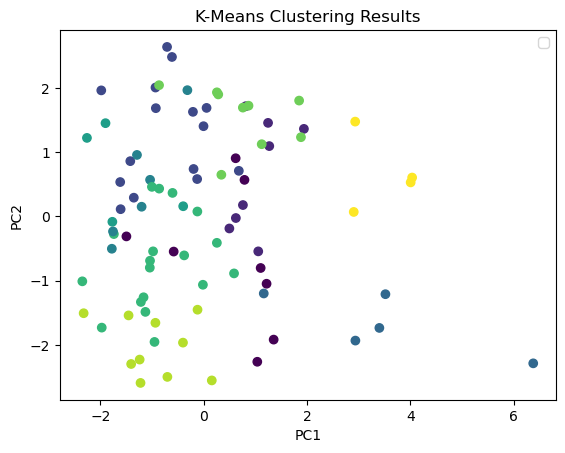

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the features to use for the model
features = ['release date','danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a new dataframe with only the features to use for the model
df_model = df[features]

# Scale the features
scaler = StandardScaler()
df_model_scaled = scaler.fit_transform(df_model)

# Fit the K-means model using the new dataframe
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_model_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_
df['clusters'] = labels
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_model_scaled)

# Plot the data points with different colors based on their cluster labels
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()